# Solving the n-Queens Problem using Local Search

Student Name: **Davis Vercher**

I have used the following AI tools: **ChatGPT-4**

I understand that my submission needs to be my own work: **DRV**

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the fontsize to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


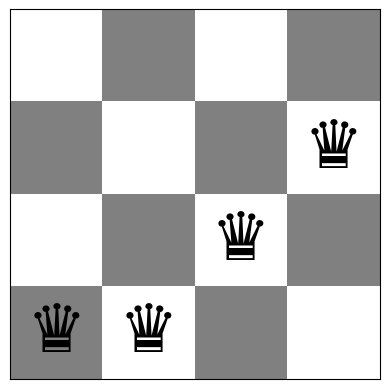

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


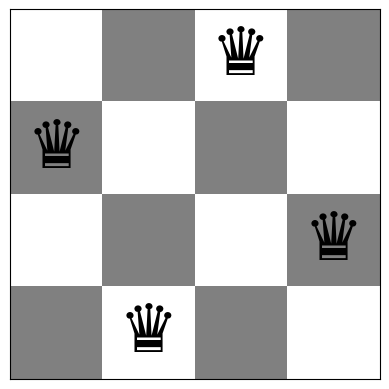

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

In [26]:
import random
import math
import time
import pandas as pd
import matplotlib.pyplot as plt

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [5]:
def steepest_ascend_hill_climbing(board):
    current_conflicts = conflicts(board)
    steps = 0
    
    while True:
        neighbors = get_neighbors(board)
        next_board = min(neighbors, key=conflicts)
        next_conflicts = conflicts(next_board)
        
        steps += 1 
        
        if next_conflicts >= current_conflicts:
            return board, steps  s
        board, current_conflicts = next_board, next_conflicts

def get_neighbors(board):
    n = len(board)
    neighbors = []
    for col in range(n):
        for row in range(n):
            if board[col] != row:  
                new_board = board.copy()
                new_board[col] = row
                neighbors.append(new_board)
    return neighbors

Solution board found in 3 steps:
Board with 0 conflicts.


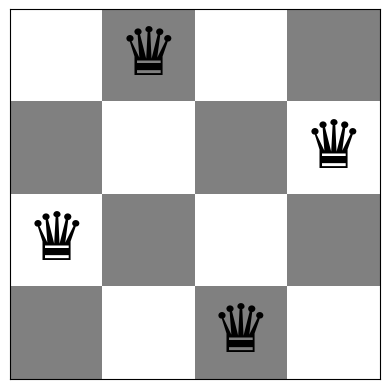

In [6]:
initial_board = random_board(4)
solution_board, steps_taken = steepest_ascend_hill_climbing(initial_board)

print(f"Solution board found in {steps_taken} steps:")
show_board(solution_board)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [89]:
def stochastic_hill_climbing(board):
    current_conflicts = conflicts(board)
    steps = 0  
    
    while True:
        neighbors = get_neighbors(board)
        uphill_moves = [neighbor for neighbor in neighbors if conflicts(neighbor) < current_conflicts]
        
        if not uphill_moves:
            return board, steps
        
        next_board = random.choice(uphill_moves)
        current_conflicts = conflicts(next_board)
        
        steps += 1
        
        board = next_board

Solution board found in 2 steps:
Board with 0 conflicts.


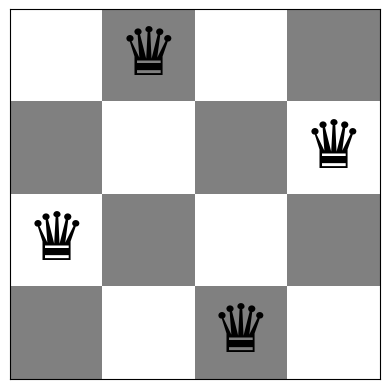

In [8]:
initial_board = random_board(4)
solution_board, steps_taken = stochastic_hill_climbing(initial_board)

print(f"Solution board found in {steps_taken} steps:")
show_board(solution_board)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [9]:
def first_choice_hill_climbing(board, max_no_improve=25):
    current_conflicts = conflicts(board)
    no_improve_count = 0  
    steps = 0  
    
    while no_improve_count < max_no_improve:
        neighbor = get_random_neighbor(board)
        neighbor_conflicts = conflicts(neighbor)
        
        steps += 1  
        
        if neighbor_conflicts < current_conflicts:
            board, current_conflicts = neighbor, neighbor_conflicts
            no_improve_count = 0  
        else:
            no_improve_count += 1  
            
    return board, steps

def get_random_neighbor(board):
    n = len(board)
    col = random.randint(0, n-1)
    row = random.randint(0, n-1)
    while board[col] == row:  
        row = random.randint(0, n-1)
    new_board = board.copy()
    new_board[col] = row
    return new_board

Solution board found in 32 steps:
Board with 1 conflicts.


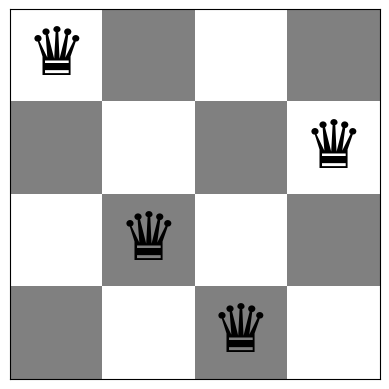

In [10]:
initial_board = random_board(4)
solution_board, steps_taken = first_choice_hill_climbing(initial_board)

print(f"Solution board found in {steps_taken} steps:")
show_board(solution_board)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [11]:
def hill_climbing_with_random_restarts(algorithm, board_size=4, max_restarts=100, **kwargs):
    best_board = None
    best_conflicts = float('inf')
    total_steps = 0 
    num_restarts = 0  
    
    for _ in range(max_restarts):
        num_restarts += 1  
        initial_board = random_board(board_size)  # 4x4 board is default
        solution_board, steps_taken = algorithm(initial_board, **kwargs)
        
        current_conflicts = conflicts(solution_board)
        
        if current_conflicts < best_conflicts:
            best_board, best_conflicts = solution_board, current_conflicts
            
        total_steps += steps_taken  
        
    return best_board, total_steps, num_restarts

Steepest Ascent Hill Climbing: Best solution found in a total of 316 steps across 100 restarts:
Board with 0 conflicts.


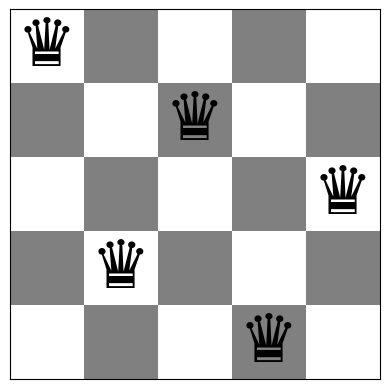

Stochastic Hill Climbing: Best solution found in a total of 280 steps across 100 restarts:
Board with 0 conflicts.


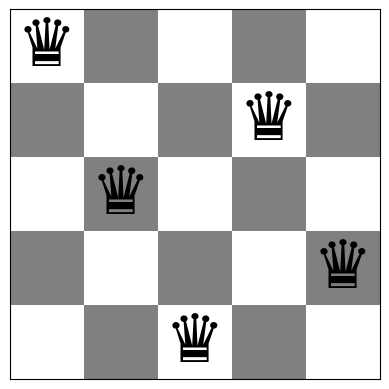

First Choice Hill Climbing: Best solution found in a total of 3718 steps across 100 restarts:
Board with 0 conflicts.


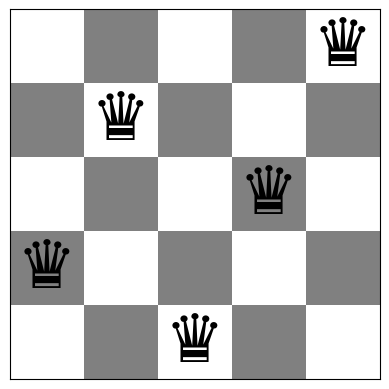

In [12]:
initial_board = random_board(5)

# steepest ascend hill climbing:
solution_board, total_steps, total_restarts = hill_climbing_with_random_restarts(steepest_ascend_hill_climbing, board_size=5)
print(f"Steepest Ascent Hill Climbing: Best solution found in a total of {total_steps} steps across {total_restarts} restarts:")
show_board(solution_board)

# stochastic hill climbing:
solution_board, total_steps, total_restarts = hill_climbing_with_random_restarts(stochastic_hill_climbing, board_size=5)
print(f"Stochastic Hill Climbing: Best solution found in a total of {total_steps} steps across {total_restarts} restarts:")
show_board(solution_board)

# first choice hill climbing:
solution_board, total_steps, total_restarts = hill_climbing_with_random_restarts(first_choice_hill_climbing, board_size=5, max_no_improve=25)
print(f"First Choice Hill Climbing: Best solution found in a total of {total_steps} steps across {total_restarts} restarts:")
show_board(solution_board)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

In [13]:
def simulated_annealing(initial_board, initial_temp=1000, cooling_rate=0.995, min_temp=1e-3):
    current_board = initial_board.copy()
    current_conflicts = conflicts(current_board)
    temp = initial_temp
    steps = 0

    while temp > min_temp:
        neighbor = get_random_neighbor(current_board)
        neighbor_conflicts = conflicts(neighbor)

        if neighbor_conflicts < current_conflicts or random.uniform(0, 1) < math.exp((current_conflicts - neighbor_conflicts) / temp):
            current_board, current_conflicts = neighbor, neighbor_conflicts

        temp *= cooling_rate
        steps += 1

        if current_conflicts == 0:  
            break

    return current_board, steps

Solution board found in 147 steps:
Board with 0 conflicts.


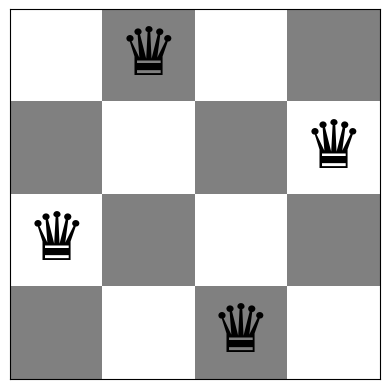

In [23]:
initial_board = random_board(4)
solution_board, steps_taken = simulated_annealing(initial_board)

print(f"Solution board found in {steps_taken} steps:")
show_board(solution_board)

## Task 6: Compare Performance [10 Points]

Use runtime and objective function value to compare the algorithms.

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [47]:
board_sizes = [4, 8, 12, 16, 32, 48, 64]
algorithms = [
    'steepest_ascend_hill_climbing', 
    'stochastic_hill_climbing', 
    'first_choice_hill_climbing', 
    'simulated_annealing'
]

algorithm_functions = {
    'steepest_ascend_hill_climbing': steepest_ascend_hill_climbing,
    'stochastic_hill_climbing': stochastic_hill_climbing,
    'first_choice_hill_climbing': first_choice_hill_climbing,
    'simulated_annealing': simulated_annealing
}

results = {}

for size in board_sizes:
    for algorithm_name in algorithms:
        algorithm_function = algorithm_functions[algorithm_name]
        
        runtimes = []
        conflicts_list = []
        
        for _ in range(10):
            initial_board = random_board(size)
            
            start_time = time.time()
            solution_board, _ = algorithm_function(initial_board)
            end_time = time.time()
            
            runtimes.append(end_time - start_time)
            conflicts_list.append(conflicts(solution_board))
        
        avg_runtime = sum(runtimes) / len(runtimes)
        avg_conflicts = sum(conflicts_list) / len(conflicts_list)
        
        if algorithm_name not in results:
            results[algorithm_name] = {}
        results[algorithm_name][size] = (avg_runtime, avg_conflicts)

In [71]:
df_runtimes = pd.DataFrame({algo: {size: results[algo][size][0] for size in board_sizes} for algo in algorithms})
df_conflicts = pd.DataFrame({algo: {size: results[algo][size][1] for size in board_sizes} for algo in algorithms})

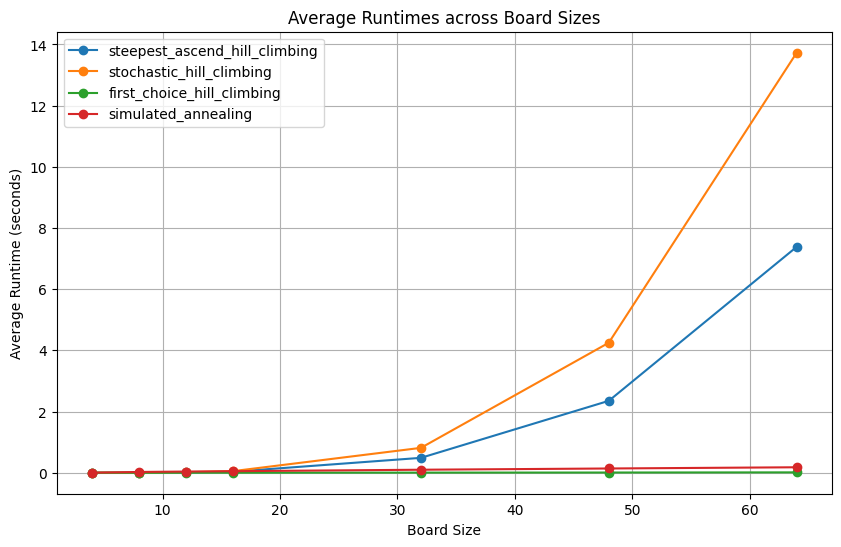

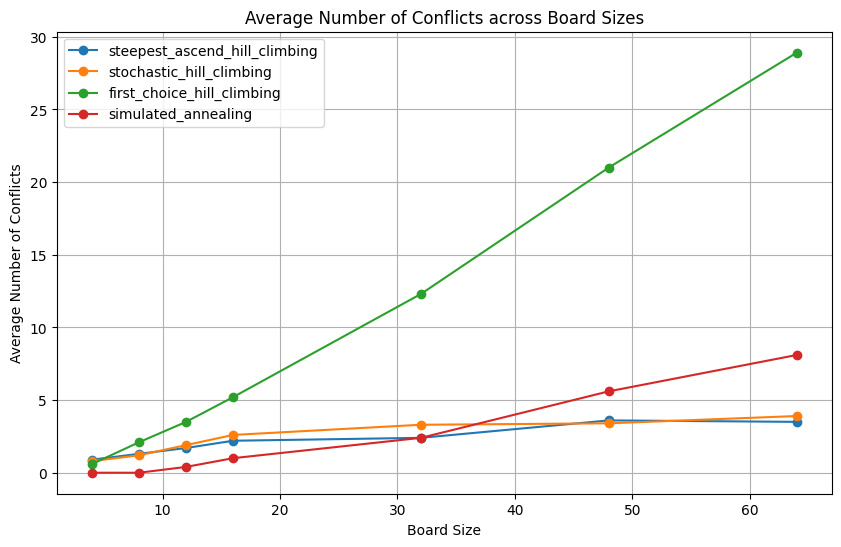

In [72]:
# Plotting Runtimes
plt.figure(figsize=(10, 6))

for algo in algorithms:
    plt.plot(board_sizes, df_runtimes[algo], label=algo, marker='o')

plt.xlabel('Board Size')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average Runtimes across Board Sizes')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Conflicts
plt.figure(figsize=(10, 6))

for algo in algorithms:
    plt.plot(board_sizes, df_conflicts[algo], label=algo, marker='o')

plt.xlabel('Board Size')
plt.ylabel('Average Number of Conflicts')
plt.title('Average Number of Conflicts across Board Sizes')
plt.legend()
plt.grid(True)
plt.show()


From here I can see that though the first-choice hill climbing algorithm was the fastest (with simulated annealing in a close second), the first-choice algorithm performed the worst at minimizing conflicts. 

As the board size got larger, the stochastic and steepest algorithms became slower exponentially even though they both performed the best at minimizing conflicts. 

Overall, simulated annealing provided both a fast algorithm without sacrificing on conflict minimization.



If we define a reasonable amount of time to solve as under 1 second, then simulated annealing and first-choice always provided a solution in a reasonable amount of time up to a 64x64 square board size (this was the largest board tested)

Stochastic began to run past 1 second around the 30x30 board size, and Steepest around 35x35. 

## Graduate student advanced task: Exploring other Local Moves [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Implement a few different local moves. Implement:

* moving a queen only one square at a time
* switching two columns
* more moves which move more than one queen at a time.

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [85]:
def move_one_square(board, col):
    direction = random.choice([-1, 1])
    new_row = (board[col] + direction) % len(board)
    new_board = board[:]
    new_board[col] = new_row
    return new_board

def switch_two_columns(board):
    col1, col2 = random.sample(range(len(board)), 2)
    new_board = board[:]
    new_board[col1], new_board[col2] = board[col2], board[col1]
    return new_board

def move_two_queens(board):
    new_board = move_one_square(board, random.choice(range(len(board))))
    new_board = move_one_square(new_board, random.choice(range(len(board))))
    return new_board

def stochastic_hill_climbing_2(board, local_moves):
    current_conflicts = conflicts(board)
    steps = 0  
 
    while steps < max_iter:
        move = random.choice(local_moves)
        if move == move_one_square:
            col = random.choice(range(len(board)))
            neighbor = move(board, col)
        else:
            neighbor = move(board)
        if conflicts(neighbor) < current_conflicts:
            board = neighbor
            current_conflicts = conflicts(neighbor)
        else:
            return board, steps
        steps += 1

    return board, steps

In [90]:
board = random_board(8)
max_iter = 1000

result_normal = stochastic_hill_climbing(board)
result_move_one = stochastic_hill_climbing_2(board, [move_one_square])
result_switch_two = stochastic_hill_climbing_2(board, [switch_two_columns])
result_move_two = stochastic_hill_climbing_2(board, [move_two_queens])
result_combined = stochastic_hill_climbing_2(board, [move_one_square, move_two_queens])

Normal Stochastic Result:
Number of Steps: 5
Board with 1 conflicts.


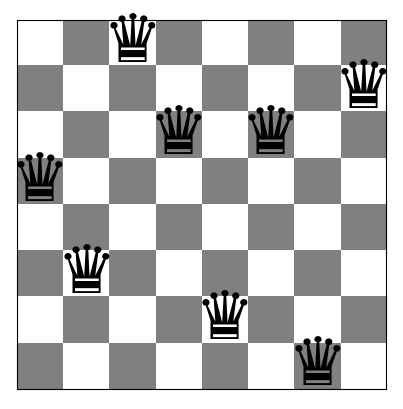

-----------------------------
Move One Square Result:
Number of Steps: 1
Board with 7 conflicts.


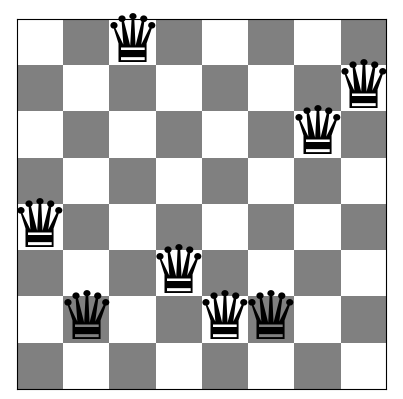

-----------------------------
Switch Two Columns Result:
Number of Steps: 0
Board with 7 conflicts.


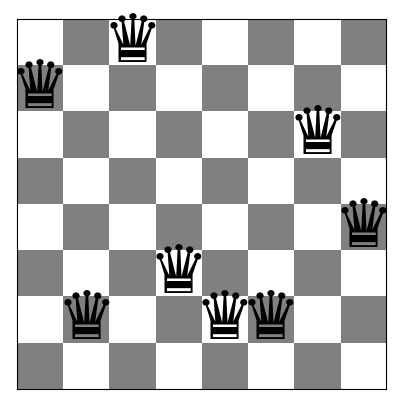

-----------------------------
Move Two Queens Result:
Number of Steps: 0
Board with 8 conflicts.


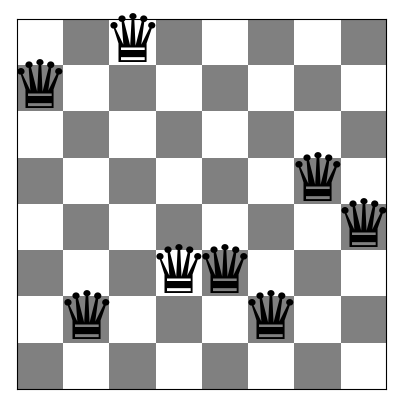

-----------------------------
Combined Move Result:
Number of Steps: 0
Board with 9 conflicts.


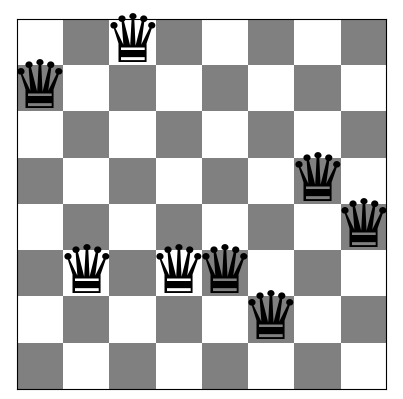

-----------------------------


In [100]:
boards_and_moves = {
    "Move One Square": [move_one_square],
    "Switch Two Columns": [switch_two_columns],
    "Move Two Queens": [move_two_queens],
    "Combined Move": [move_one_square, move_two_queens]
}

result_board, steps_taken = stochastic_hill_climbing(board[:])
print(f"Normal Stochastic Result:")
print(f"Number of Steps: {steps_taken}")
show_board(result_board)
print("-----------------------------")

for move_name, moves in boards_and_moves.items():
    result_board, steps_taken = stochastic_hill_climbing_2(board[:], moves)
    print(f"{move_name} Result:")
    print(f"Number of Steps: {steps_taken}")
    show_board(result_board)
    print("-----------------------------")

I am not sure if I have implemented these alternative local moves correctly. Based on the number of conflicts and the number of steps, it seems like my stochastic algorithm with different local moves is finding a local optima very quickly (in 0 to 1 step) every time, with the number of conflicts being around 7-10 for any of the alternative local moves (which is not much different than the 'normal' stochastic algorithm.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here